In [2]:
from brian2 import *

In [12]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(5, eqs, threshold='v>0.8', reset='v = 0', method='exact')

spikemon = SpikeMonitor(G)

run(50*ms)

print(spikemon.t/ms, spikemon.i, spikemon.count)

[16.  16.  16.  16.  16.  32.1 32.1 32.1 32.1 32.1 48.2 48.2 48.2 48.2
 48.2] <spikemonitor_1.i: array([0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4])> <spikemonitor_1.count: array([3, 3, 3, 3, 3])>


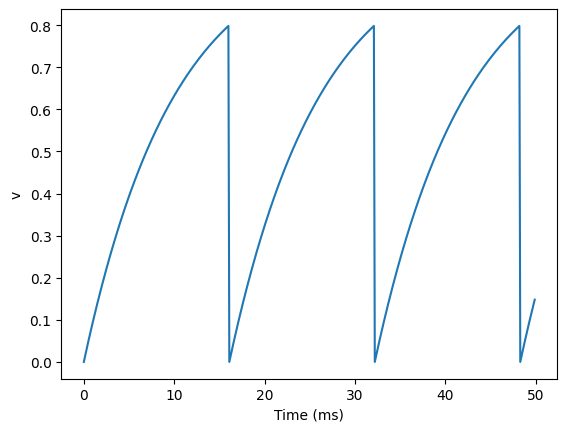

In [4]:
start_scope()

tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''

G = NeuronGroup(2, eqs, threshold='v>0.8', reset='v = 0', method='exact')

M = StateMonitor(G, 'v', record=0)
run(50*ms)
plot(M.t/ms, M.v[0])
xlabel('Time (ms)')
ylabel('v');

In [43]:
neurons_with_classes = {'a': [5, 5, 3], 
                        'b': [1, 1, 3], 
                        'c': [5, 1, 1, 5]}

for key in neurons_with_classes.keys():
            neurons_with_classes[key] = max(neurons_with_classes[key], 
                                            key=neurons_with_classes[key].count)
neurons_with_classes           

{'a': 5, 'b': 1, 'c': 5}

In [25]:
import networkx as nx
def generate_small_world(n_nodes, k, p):
    return nx.watts_strogatz_graph(n_nodes, k, p)

g = generate_small_world(7, 3, 0.5)

edges = g.edges()

res_0 = [0]
for g, v in g.edges():
    if g == 0:
        res_0.append(v)
        

# Выводим список связанных нейронов
print(res, edges)

[0, 6, 2] [(0, 6), (0, 2), (1, 2), (2, 3), (3, 5), (4, 5), (5, 6)]


In [27]:
list1 = [1, 2, 3, 4, 2, 5, 2]
list2 = [2, 4]

# Получаем позиции элементов из list1, которые равны элементам из list2
positions = [index for index, value in enumerate(list1) if value in list2]

# Выводим позиции
print(positions)

[1, 3, 4, 6]


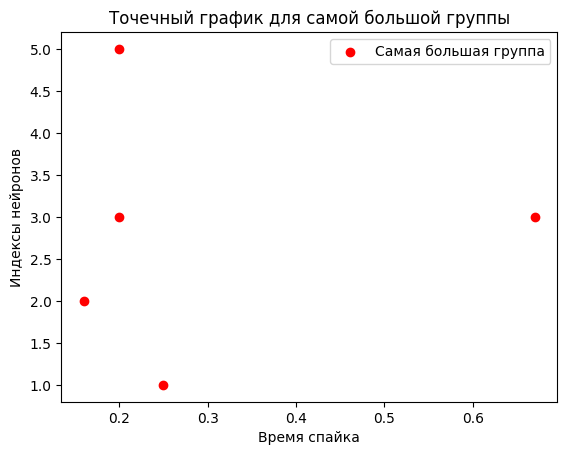

In [17]:
import matplotlib.pyplot as plt
from collections import defaultdict

# Пример данных времени спайков нейронов и их индексов
# Пример данных времени спайков нейронов и их индексов
spike_times = [0.25, 0.16, 0.2, 0.8, 0.2, 0.52, 0.6, 0.61, 0.67]
neuron_indices = [1, 2, 3, 4, 5, 6, 1, 2, 3]
dt = 0.05  # Временная дельта в секундах

# Создание словаря, где ключ - время спайка, значение - индекс нейрона
spike_dict = defaultdict(list)
for time, neuron in zip(spike_times, neuron_indices):
    spike_dict[time].append(neuron)

# Находим самую большую группу одновременно спайкующих нейронов
max_group = max(spike_dict.values(), key=len)
max_time = max(spike_dict, key=lambda k: len(spike_dict[k]))

# Формируем данные для построения графика для нейронов из самой большой группы
max_group_spike_times = []
max_group_neuron_indices = []
for time, neurons in spike_dict.items():
    for neuron in neurons:
        if abs(time - max_time) <= dt or neuron in max_group:
            max_group_spike_times.append(time)
            max_group_neuron_indices.append(neuron)

plt.scatter(max_group_spike_times, max_group_neuron_indices, color='red', label='Самая большая группа')
plt.xlabel('Время спайка')
plt.ylabel('Индексы нейронов')
plt.title('Точечный график для самой большой группы')
plt.legend()
plt.show()

In [2]:
import os 

len(os.listdir('spikes'))

0

0.2 0.2
0.0
0.18 0.2
0.020000000000000018
0.21 0.2
0.009999999999999981
0.49 0.2
0.29
0.51 0.49
0.020000000000000018
0.52 0.49
0.030000000000000027
0.53 0.49
0.040000000000000036
0.55 0.49
0.06000000000000005
0.59 0.55
0.039999999999999925
0.8 0.55
0.25


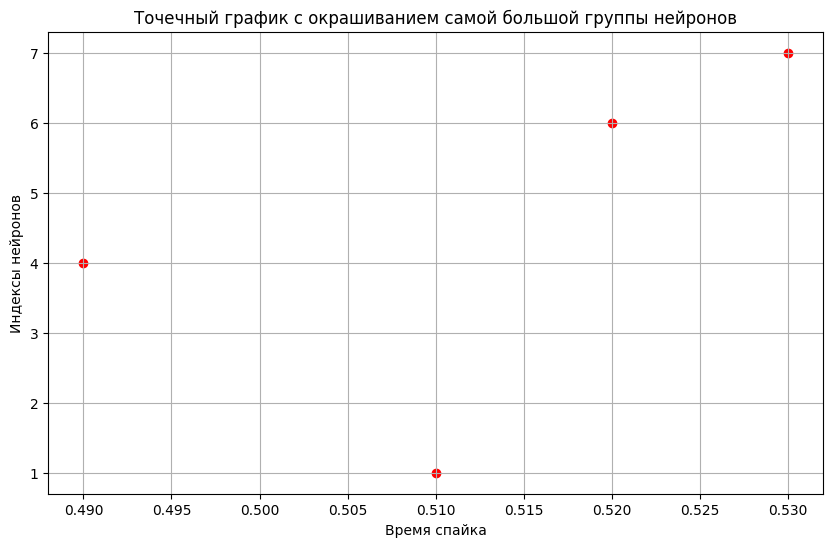

In [26]:
import matplotlib.pyplot as plt

# Пример данных времени спайков нейронов и их индексов
spike_times = [0.2, 0.18, 0.21, 0.49, 0.51, 0.52, 0.53, 0.55,  0.59, 0.8]
neuron_indices = [0, 2, 3, 4, 1, 6, 7, 8, 9, 10]
dt = 0.05  # Пороговое значение времени для считывания одновременных спайков


# Создание словаря для хранения индексов нейронов и их времени спайков
neuron_data = {neuron: time for neuron, time in zip(neuron_indices, spike_times)}

# Создание групп нейронов на основе условия разницы времени спайков меньше 50 мс
current_group = []
prev_time = spike_times[0]
max_group = []

for neuron, time in neuron_data.items():
    if abs(time - prev_time) < dt:
        current_group.append(neuron)
        
    else:
        if len(current_group) > len(max_group):
            max_group = current_group.copy()
        current_group = [neuron]
        prev_time = time

if len(current_group) > len(max_group):
    max_group = current_group.copy()

# Создание цветовой метки для самой большой группы нейронов
colors = ['r']

# Построение точечного графика с окрашиванием нейронов самой большой группы
plt.figure(figsize=(10, 6))
for neuron in max_group:
    plt.scatter(neuron_data[neuron], neuron, color='r')

plt.xlabel('Время спайка')
plt.ylabel('Индексы нейронов')
plt.title('Точечный график с окрашиванием самой большой группы нейронов')
plt.grid(True)
plt.show()

In [27]:
max_group

[4, 1, 6, 7]